# TD on Support Vector Machines or SVMs (1/?)

### Usage of this notebook
- __run a cell__ with **_ctrl-enter_** or **_shift-enter_**
- __use the command palette__ with **_ctrl-shift-P_** to find more complex commands

Use it referably with __Edge__ or __Chrome__



In [2]:
#Some typical scientific & data manipulation packages
import numpy as np
import pandas as pd

#Keras, deep learning library, used here only to load the MNIST dataset
from keras.datasets import mnist

#Imports from sklearn package: data generation, svm module & metrics
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, mean_squared_error


#Visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

# **Exercise 1. Implement your own simple linear SVM classifier**

#### Let's write a simplified code for SVMs on a random dataset
- 1.1. Generate random dataset & visualize it (done)
- 1.2. Write a generic code for SVM training (fit) 
- 1.3. Play around with dataset & algorithm parameters. Visualize optimum boundary.
- 1.4. Let's try the multiclass classification [optional]


### 1.1 Initialization

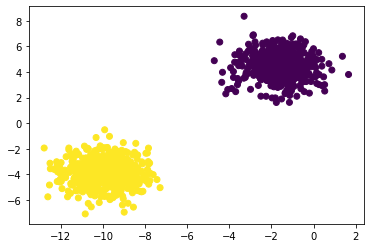

In [3]:
#Generate random dataset 
X, Y = make_blobs(n_samples=1000, centers=2, random_state=1, cluster_std=1)

#Visualize the dataset
plt.scatter(X[:,0], X[:,1], c=Y)

In [4]:
#n_samples = nombre de points qu'on a généré dans X notre échantillon de base 

### 1.2 Simple linear Support Vector Machine code

In [5]:
class SVM:

  #Initialization of algorithm parameters
  def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
    self.lr = learning_rate
    self.lambda_param = lambda_param
    self.n_iters = n_iters
    self.w = None
    self.b = None

  def fit(self, X, Y):
    n_samples, n_features = X.shape #Samples => lines, features => columns of X

    #Change class label from 0 to -1 => (6 different ways: https://datagy.io/python-replace-item-in-list/)
    Y = np.where(Y==0,-1,1)

    #Initialize weights and bias to zero for start, remember that w is a vector so you must use np.zeros(dim), b is a scalar
    self.w = np.zeros(n_features)
    self.b = 0

    #Iterate over the predefined amount of iterations on __init__ of your class
    for iter in range(self.n_iters):

      #For each point Xi in your dataset
      for idx, Xi in enumerate(X):

        #Test your condition: is Yi(Xi.W - b) >= 1?
        condition = Y[idx]* (np.dot(Xi,self.w)-self.b) >=1

        #If the condition is satisfied, points are correctly classified and then update the weights accordingly
        if condition:
          self.w -= self.lr * (self.lambda_param * self.w)
        else:
          self.w -= self.lr*(self.lambda_param * self.w - np.dot(Xi,Y[idx]))
          # Update the bias
          self.b -= self.lr * Y[idx]

  def predict(self, X):
    #Equation => y = wX - b
    y_pred = np.dot(X,self.w)-self.b
    #Return the sign of this approximation
    return np.sign(y_pred)


clf = SVM()
clf.fit(X,Y)
print(clf.w, clf.b)
#Predictions = clf.predict(my_point) #You can take random points and make a prediction

[-0.18395027 -0.30394873] 0.9830000000000008


### 1.3 Play with :
- the input dataset 
  - nb of samples
  - cluster std
  - random state
- the SVM algorithm hyperparameters
  - learning rate
  - lambda
  - nb iterations
  & launch the visualization code below to view the results.

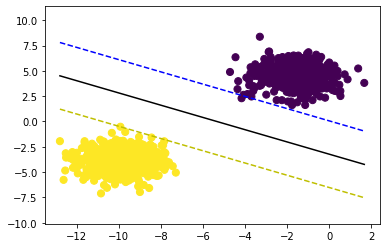

In [6]:
def visualize_svm():
  def get_hyperplane_value(x, w, b, offset):
      return (-w[0] * x + b + offset) / w[1]

  fig = plt.figure()
  ax = fig.add_subplot(1, 1, 1)
  plt.scatter(X[:,0], X[:,1], c=Y, s=50)

  x0_1 = np.amin(X[:,0])
  x0_2 = np.amax(X[:,0])

  x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
  x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

  x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
  x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

  x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
  x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

  ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")
  ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "b--")
  ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "y--")

  x1_min = np.amin(X[:,1])
  x1_max = np.amax(X[:,1])
  ax.set_ylim([x1_min - 3, x1_max + 3])

  plt.show()

visualize_svm()

### 1.4 Multiclass classifier [OPTIONAL]

You can try to implement the one-vs-one or the one-vs-rest method using the SVM class above

0


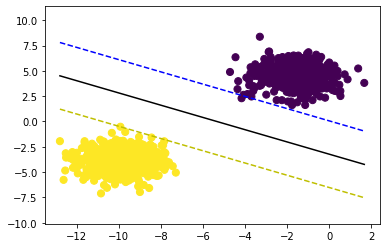

1


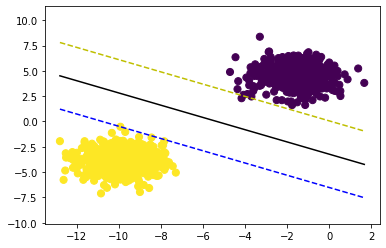

In [7]:
#One versus rest
for i in set(Y):
  print(i)
  #Convert ouput Y
  new_Y=np.array([0 if n==i else 1 for n in Y])
  #Call SVM instance
  clf=SVM()
  clf.fit(X,new_Y)
  visualize_svm()

In [8]:
#locate permet de retourner les index correspondant à une condition spécifique.
#index_list_i + index_list_j permet de faire la concaténation de ces deux listes et non l'addition des valeurs de la liste.

0 1


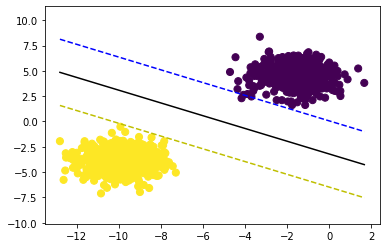

In [9]:
#One versus one

from more_itertools import locate


for i in set(Y):
  for j in set(Y):
    if j>i:
      print(i,j)
      #Filter dataset
      index_list_i=list(locate(Y,lambda x: x==i))
      index_list_j=list(locate(Y,lambda x: x==j))
      new_X=np.array([X[n] for n in index_list_i+index_list_j])
      new_Y=np.array([Y[n] for n in index_list_i+index_list_j])
      for x,v in enumerate(new_Y):
        if v == i:
          new_Y[x]= 0 
        elif v == j:
          new_Y[x]= 1
        #Call SVM instance
      clf=SVM()
      clf.fit(new_X,new_Y)
      visualize_svm()

# **Exercise 2. Multi-class classification problem - Support Vector Classifier (SVC)**

#### Let's test SVMs on images of the MNIST dataset 
First steps: loading the data set, displaying images & input formatting have been done for you. You will have to focus on:
- 2.4. Training your SVM (select best kernel and parameters)
- 2.5. Making predictions
- 2.6. Measuring its accuracy
- 2.7. [Optional] Compare your results with the ones obtained with your handmade neural network (do you remember!?)

### 2.1. Load the data set (done)

In [10]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


### 2.2. Display images (done)

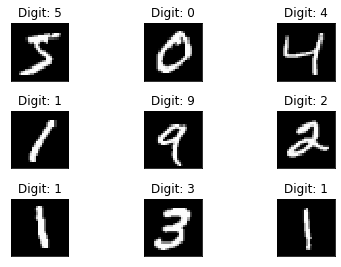

In [11]:
#2.2.1
imagesfig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(Y_train[i]))
  plt.xticks([])
  plt.yticks([])

Input vector: [  0   0   0   0   0   0   0   0  76 252 253 223  37   0  48 174 252 252
 242 214 253 199  31   0   0   0   0   0] 


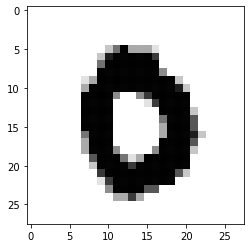

Label: 0


In [12]:
#2.2.2 What input vector & labels look like for a given image
#Re-run several times to display several images
#Choose a train image at random
i = np.random.randint(0,X_train.shape[0]-1)
print("Input vector: {} ".format(X_train[13, 13]))

#Display image
plt.imshow(1.0-X_train[i,:].reshape(28,28),cmap="gray")
plt.show()

#Display label
print("Label: {}".format(Y_train[i]))

### 2.3. Input data reshaping (done)

Reshape MNIST inputs to vector of length 784 (28*28) and scale to the [0-1] range

In [13]:
img_rows, img_cols = 28, 28
X_train = X_train.reshape(X_train.shape[0], img_rows * img_cols) / 255
X_test = X_test.reshape(X_test.shape[0], img_rows * img_cols) / 255

### 2.4. Train your multiclass SVM classifier
Or use sklearn library: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Note that we are predicting a class among: 0, 1, 2, 3, 4, 5, 6, 7, 8 & 9.


/!\ Please, don't take the entire dataset (take 1000 to 10000 samples otherwise you'll never get the result !)

In [14]:
model = svm.SVC()
model.fit(X_train[:1000],Y_train[:1000])

SVC()

### 2.5. Make a prediction for a random image of the test dataset

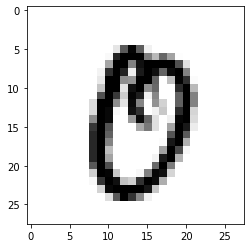

Predicted label: 0
Actual label: 0 


In [15]:
#Re-run several times to test several images

#Choose a test image at random
i = np.random.randint(0, X_test.shape[0]-1)

#Display image
plt.imshow(1.0-X_test[i,:].reshape(28, 28),cmap="gray")
plt.show()

#Predict the value
single_prediction = model.predict([X_test[i,:]])

#Display label
print("Predicted label: {}\nActual label: {} ".format(single_prediction[0],
                                                      Y_test[i]))

### 2.6. Measure the accuracy

Accuracy= 0.875


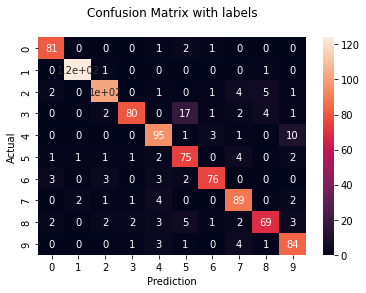

In [16]:
#Measure accuracy on a subset of the test set which was not used during training
Y_predicted = model.predict(X_test[:1000])

#Compute the accuracy
print("Accuracy=", accuracy_score(Y_test[:1000], Y_predicted))

#Set the confusion matrix & display it
cf_matrix = confusion_matrix(Y_test[:1000], Y_predicted)

ax = sns.heatmap(cf_matrix, annot=True)

ax.set_title('Confusion Matrix with labels\n');
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual');
ax.xaxis.set_ticklabels([i for i in range(10)])
ax.yaxis.set_ticklabels([i for i in range(10)])

#Display the visualization of the Confusion Matrix.
plt.show()

In [17]:
#Generate class membership probabilities
y_preb_probs = model.predict_proba(X_test)

roc_auc = roc_auc_score(
  Y_test, y_preb_probs, average="weighted", multi_class="ovo"
)
print("ROC AUC score: {}".format(roc_auc))

AttributeError: ignored

In [ ]:
#Observe the pictures badly classified to check if you could have done better:
for i in range(100):
  if Y_test[i] != Y_predicted[i]:
    # Display image
    plt.imshow(1.0-X_test[i,:].reshape(28, 28),cmap="gray")
    plt.show()

    #Display label
    print("Predicted label: {}\nActual label: {} ".format(Y_predicted[i],
                                                          Y_test[i]))

# **Exercise 3. Simple regression problem - Support Vector Regressor (SVR)**

#### Let's try SVMs on the prediction of fishes' weight based on their size characteristics
- 3.1. Load the dataset and split into train & test (done): it can be found [here](https://www.kaggle.com/aungpyaeap/fish-market?select=Fish.csv)
- 3.2. Do some exploration & transformation
- 3.3. Split dataset into train & test
- 3.4. Train your SVR (use sklearn.svm.SVR() function)
- 3.5. Measure the accuracy of your model
- 3.6. Improve your model

In [ ]:
import os
from google.colab import drive

#Get the current location of your notebook
print(os.getcwd())

#Connect to your drive (it will ask you your Google account)
drive.mount(os.getcwd()+'/drive')

#Navigate and list content of your Drive folders
print(os.listdir('drive/MyDrive/???'))

In [18]:
#3.1 Load the dataset
dataset = pd.read_csv("Fish.csv")
dataset.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


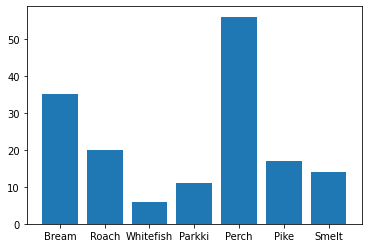

In [19]:
#3.2.1 View distribution of the fish species
species = dataset.Species.unique()
count = [len(dataset.loc[dataset.Species==species]) 
         for species in dataset.Species.unique()]
plt.bar(species, count)
plt.show()

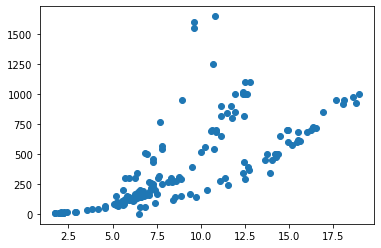

In [20]:
#3.2.2 Plot relationships between variables
df = dataset.loc[dataset.Species=="Perch"]
plt.scatter(dataset["Height"], dataset["Weight"])

In [21]:
#3.2.3 Print the correlation matrix
Corr_Matrix = round(df.corr(),2)
print(Corr_Matrix)

         Weight  Length1  Length2  Length3  Height  Width
Weight     1.00     0.96     0.96     0.96    0.97   0.96
Length1    0.96     1.00     1.00     1.00    0.99   0.97
Length2    0.96     1.00     1.00     1.00    0.99   0.97
Length3    0.96     1.00     1.00     1.00    0.99   0.98
Height     0.97     0.99     0.99     0.99    1.00   0.98
Width      0.96     0.97     0.97     0.98    0.98   1.00


In [22]:
#3.2.4 One hot encode the only categorical column of the dataset (use pd.get_dummies)
dataset = pd.get_dummies(dataset, columns=['Species'], drop_first=True)
dataset.head()

,Weight,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,0,0,0,0,0,0


In [23]:
#3.3 Split train / test
X_train, X_test = train_test_split(dataset, train_size=0.8, random_state=21)
Y_train = X_train.Weight
Y_test = X_test.Weight
del X_train["Weight"]
del X_test["Weight"]

In [ ]:
#3.4 Train your model
model = ???
model = model.fit(???)

In [ ]:
#3.5 Evaluate your model (here RMSE)
Y_pred = model.predict(???)
mean_squared_error(Y_test, Y_pred, squared=False)

### 3.6 Improve your model by tuning SVR hyperparameters
We will use the function: sklearn.model_selection.GridSearchCV(estimator, param_grid) where:
- estimator: estimator object, svm.SVC() in our case
- param_grid: dict with parameters names (string) as keys and lists of parameter settings to try as values

In [ ]:
param_grid = {
    "kernel": [???],
    "C": [???],
    "gamma": [???],
    "epsilon": [???]
}
grid = GridSearchCV(???, ???, scoring="neg_root_mean_squared_error", cv=???)
grid.fit(X_train, Y_train)

print("We obtained a training RMSE score of:", abs(grid.best_score_), "with parameters:", grid.best_params_)